## Case Study : Analysis on Red and White Wine using its properties

In [642]:
#import necessary libraries and load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

red_df = pd.read_csv(r'C:\Users\vanes\Downloads\winequality-red.csv', sep=';')
white_df = pd.read_csv(r'C:\Users\vanes\Downloads\winequality-white.csv', sep=';')

In [643]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [644]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


#### no. of samples in each set and features

In [645]:
red_df.shape

(1599, 12)

In [646]:
white_df.shape

(4898, 12)

#### features with missing data

In [647]:
red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [648]:
white_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Both datasets do not have any missing data

#### Duplicates

In [649]:
sum(red_df.duplicated())

240

In [650]:
sum(white_df.duplicated())

937

In [651]:
red_df[red_df.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [652]:
red_df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [653]:
white_df.nunique()

fixed acidity            68
volatile acidity        125
citric acid              87
residual sugar          310
chlorides               160
free sulfur dioxide     132
total sulfur dioxide    251
density                 890
pH                      103
sulphates                79
alcohol                 103
quality                   7
dtype: int64

In [654]:
red_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### Combining both datasets, so I create a column for each to specify their color to help in differentiating the dataset

In [655]:
red_df['color'] = 'red'
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [656]:
white_df['color'] = 'white'
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [657]:
wine_df = red_df.append(white_df, ignore_index=True)
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [658]:
# wine_df.to_csv('combined_wine_dataset.csv',index=False)

In [659]:
list(wine_df.columns)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'color']

### Exploring with visuals

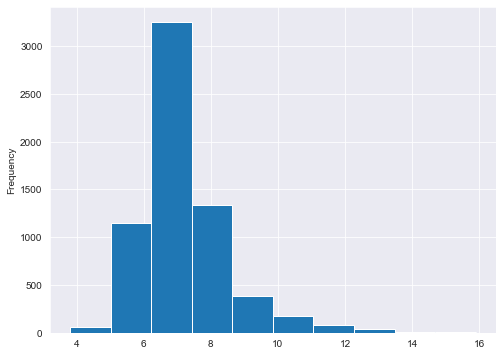

In [660]:
wine_df['fixed acidity'].plot(kind='hist', figsize=(8,6));

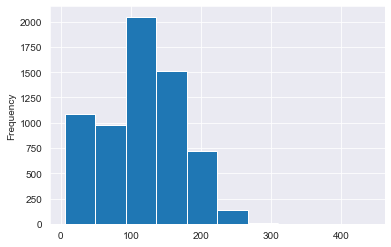

In [661]:
wine_df['total sulfur dioxide'].plot(kind='hist');

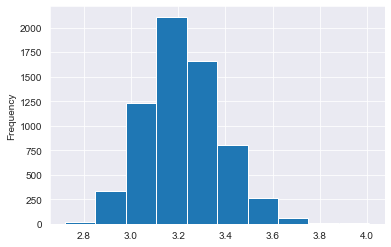

In [662]:
wine_df['pH'].plot(kind='hist');

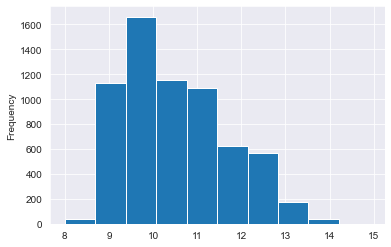

In [663]:
wine_df['alcohol'].plot(kind='hist');

Based on the visuals above the features 'Fixed Acidity' and 'Alcohol' is more skewed to the right. More wines tend to have a higher alcohol %

In [664]:
wine_df.mean()

fixed acidity             7.215307
volatile acidity          0.339666
citric acid               0.318633
residual sugar            5.443235
chlorides                 0.056034
free sulfur dioxide      30.525319
total sulfur dioxide    115.744574
density                   0.994697
pH                        3.218501
sulphates                 0.531268
alcohol                  10.491801
quality                   5.818378
dtype: float64

###  Is a certain type of wine (red or white) associated with higher quality?

In [665]:
color_means = wine_df['quality'].groupby(wine_df['color']).mean()
color_means

color
red      5.636023
white    5.877909
Name: quality, dtype: float64

White wine has a higher quality than red wine

### What level of acidity (pH value) receives the highest average rating?

In [666]:
wine_df['pH'].describe()

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [667]:
#creating a new column to group pH values since they are quantitative

In [668]:
bin_edges = [2.72, 3.11, 3.21, 3.32, 4.01]

bin_names = ['high', 'moderately high', 'medium', 'low']

In [669]:
wine_df['acidity_levels'] = pd.cut(wine_df['pH'], bin_edges, labels = bin_names)

wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,moderately high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,moderately high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [670]:
acid_means = dict(wine_df['quality'].groupby(wine_df['acidity_levels']).mean())
acid_means 


{'high': 5.783343040186372,
 'moderately high': 5.784540474741327,
 'medium': 5.850832266325224,
 'low': 5.8595933926302415}

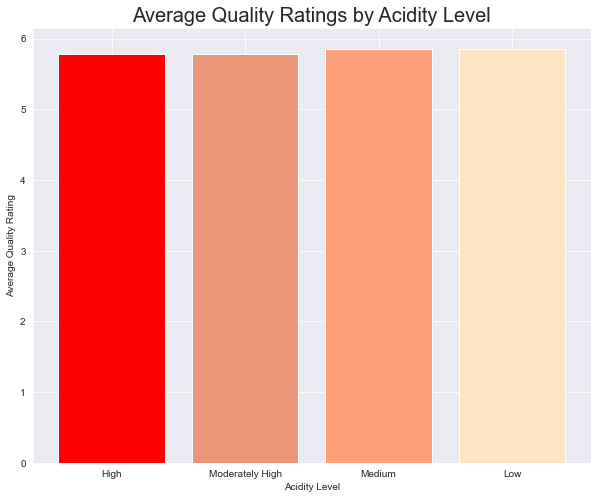

In [671]:
location_acid = [1,2,3,4]
height_acid = [acid_means['high'], acid_means['moderately high'], acid_means['medium'], acid_means['low']]
labels = ['High', 'Moderately High', 'Medium', 'Low']
colors = ['red', 'darksalmon', 'lightsalmon', 'bisque']

plt.figure(figsize = (10,8))
plt.bar(location_acid ,height, tick_label = labels, color = colors);

plt.title('Average Quality Ratings by Acidity Level', size=20)
plt.xlabel('Acidity Level')
plt.ylabel('Average Quality Rating')
plt.show()

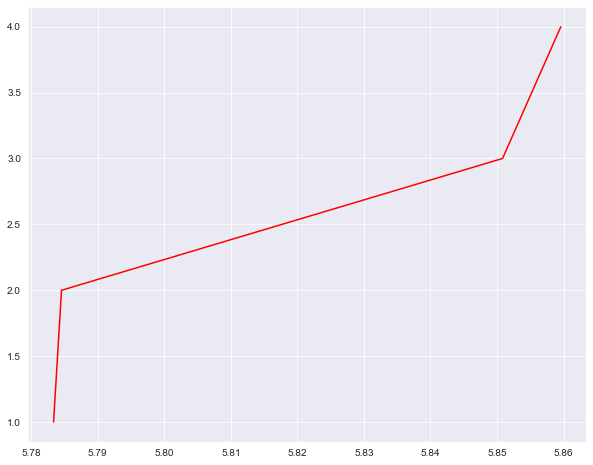

In [672]:
plt.figure(figsize=(10,8))
plt.plot(height_acid,location_acid, color = 'red');

### Do wines with higher alcoholic content receive better ratings?

In [673]:
median_alcohol = wine_df['alcohol'].median()
median_alcohol

10.3

In [674]:
#creating a new dataframe with alcohol less than the median
alcohol_low = wine_df.query('alcohol < 10.3')
alcohol_low.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,moderately high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,moderately high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [675]:
#creating a new dataframe with alcohol greater than or equal to the median
alcohol_high = wine_df.query('alcohol >= 10.3')
alcohol_high.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red,low
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red,low
16,8.5,0.280,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5,7,red,medium
31,6.9,0.685,0.00,2.5,0.105,22.0,37.0,0.9966,3.46,0.57,10.6,6,red,low
36,7.8,0.600,0.14,2.4,0.086,3.0,15.0,0.9975,3.42,0.60,10.8,6,red,low


In [676]:
low_alc_mean = alcohol_low['quality'].mean()
low_alc_mean

5.475920679886686

In [677]:
high_alc_mean = alcohol_high['quality'].mean()
high_alc_mean

6.146084337349397

Wine with higher alcohol content tend to have higher ratings(quality)

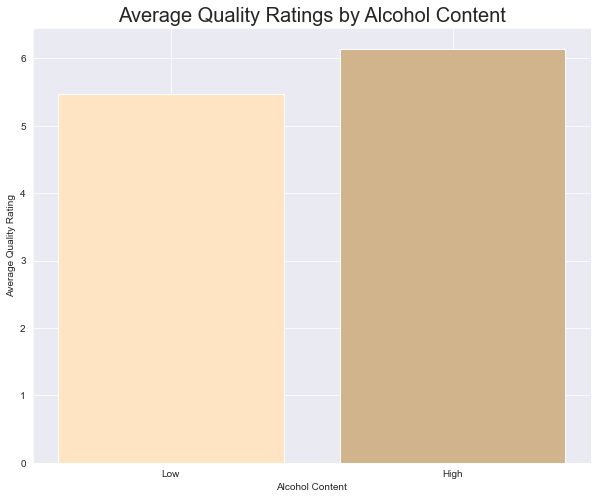

In [678]:
location_alc = [1,2]
height_alc = [low_alc_mean, high_alc_mean]
labels = ['Low', 'High']
colors = ['bisque', 'tan']

plt.figure(figsize = (10,8))
plt.bar(location_alc,height_alc, tick_label = labels, color = colors)

plt.title('Average Quality Ratings by Alcohol Content', size=20)
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating')
plt.show()

### Do sweeter wines (more residual sugar) receive better ratings?

In [679]:
median_sugar = wine_df['residual sugar'].median()
median_sugar

3.0

In [680]:
#creating a new dataframe with residual sugar greater than or equal to the median
sugar_high = wine_df.query("`residual sugar` >= 3.0")
sugar_high.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red,low
11,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red,low
14,8.9,0.62,0.18,3.8,0.176,52.0,145.0,0.9986,3.16,0.88,9.2,5,red,moderately high
15,8.9,0.62,0.19,3.9,0.170,51.0,148.0,0.9986,3.17,0.93,9.2,5,red,moderately high
18,7.4,0.59,0.08,4.4,0.086,6.0,29.0,0.9974,3.38,0.50,9.0,4,red,low


In [681]:
sugar_low = wine_df.query("`residual sugar` < 3.0")
sugar_low.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,moderately high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,moderately high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [682]:
low_sugar_mean = sugar_low['quality'].mean()
low_sugar_mean

5.808800743724822

In [683]:
high_sugar_mean = sugar_high['quality'].mean()
high_sugar_mean

5.82782874617737

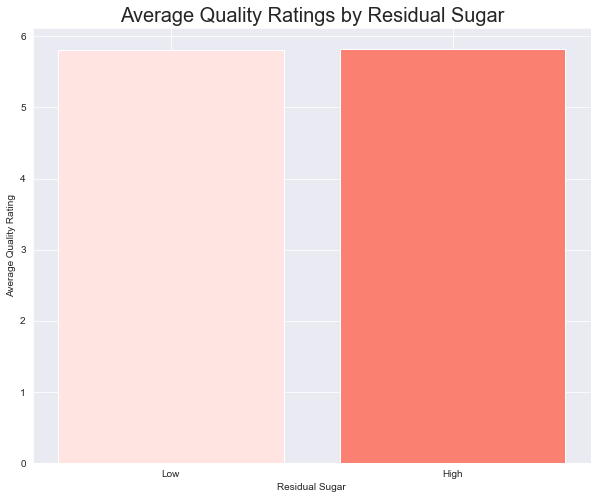

In [684]:
location_sugar = [0,1]
height_sugar = [low_sugar_mean, high_sugar_mean]
labels = ['Low', 'High']
colors = ['mistyrose', 'salmon']

plt.figure(figsize = (10,8))
plt.bar(location_sugar,height_sugar, tick_label = labels, color = colors)

plt.title('Average Quality Ratings by Residual Sugar', size=20)
plt.xlabel('Residual Sugar')
plt.ylabel('Average Quality Rating')
plt.show()

### Type and Quality Plot

In [685]:
# get counts for each rating and color
color_counts = wine_df.groupby(['color', 'quality']).count()['pH']
color_counts

color  quality
red    3            10
       4            53
       5           681
       6           638
       7           199
       8            18
white  3            20
       4           163
       5          1457
       6          2198
       7           880
       8           175
       9             5
Name: pH, dtype: int64

In [686]:
# get counts for each rating and color
color_total = wine_df.groupby(['color']).count()['pH']
color_total

color
red      1599
white    4898
Name: pH, dtype: int64

In [687]:
red_proportions = color_counts['red'] / color_total['red']
red_proportions

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
Name: pH, dtype: float64

In [688]:
white_proportions = color_counts['white'] / color_total['white']
white_proportions

quality
3    0.004083
4    0.033279
5    0.297468
6    0.448755
7    0.179665
8    0.035729
9    0.001021
Name: pH, dtype: float64

Since white wine has more ratings than red, we will use the 'white_proportions' for our x-axis width

In [689]:
red_proportions['9'] = 0

In [690]:
width = 0.3

ind = np.arange(len(white_proportions))
ind

array([0, 1, 2, 3, 4, 5, 6])

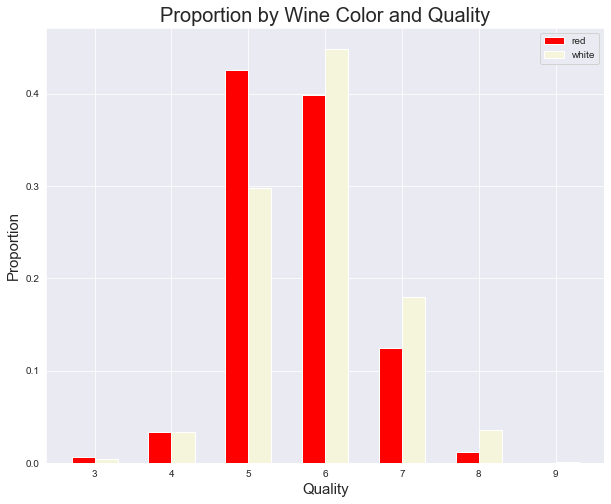

In [691]:
sns.set_style('darkgrid')
plt.figure(figsize = (10,8))

#plot bars
red_bar = plt.bar(ind, red_proportions, width, color = 'r')
white_bar = plt.bar(ind + width, white_proportions, width, color = 'beige')

# title and labels
plt.ylabel('Proportion', size = 15)
plt.xlabel('Quality', size = 15)
plt.title('Proportion by Wine Color and Quality', size=20)
locations = ind + width / 2  # xtick locations
labels = ['3', '4', '5', '6', '7', '8', '9']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend(['red', 'white']);

In [692]:
red_prop_mean = red_proportions.mean()

In [693]:
proportions = {'Red': red_proportions.mean(), 'White': white_proportions.mean()}
proportions

{'Red': 0.14285714285714285, 'White': 0.14285714285714285}